In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
from sklearn.model_selection import train_test_split

In [2]:
import model.basic_model_lib

In [3]:
%load_ext autoreload
%autoreload 2
import CCPA_lib as cp


In [4]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('talk')
sns.set_style('white')

In [5]:

ppallete = 'RdYlGn'#'YlGn_d' #"BuGn_d"
porder = ['MED4',  'MIT9312','MIT0604', 'Natl2A', 'MIT9313']
ppallete = [ '#62A586', '#face6e','#f79934', '#7A9BC8', '#F47681', ]
psizes = [150,120,200,120,350]
pmarkers = ['o', 's', '^', 'D', '*']

# #ffd7a1
    
pedge = 'green'
apallete = "spring"
aorder = ['DE', 'DE1', '1A3', 'ATCC', 'BS11']
amarkers = ['P', 'X', 'h', '<','>']
apallete = ['#6dad36', '#c7e89f', '#f5c4e1', '#d5579d', '#8a0850']

aedge='orange'
epallete = ['#6cf0ba', '#d13f75', '#eeb7cb', '#b9d2d8', '#407f90']
#sns.diverging_palette(355, 217, s=74, l=50, n=4) #'Paired' # 'BrBG'# "coolwarm"
eorder = ['e1','e3', 'e4', 'e5', 'e6']
#aedge='orange'


In [6]:
PRO_COLOR = 'MediumSeaGreen'
PRO_FL_COLOR = 'DarkGreen'
PRO_FCM_COLOR = 'MediumSpringGreen'

ALT_COLOR = 'Gold'
ALT_FCM_COLOR = 'PaleGoldenrod'
N_COLOR = 'royalblue'
ON_COLOR = 'PowderBlue'
C_COLOR = 'FireBrick'
OC_COLOR = 'LightCoral'

mcolors = {
    'b_n_p' : PRO_COLOR, 
    'b_c_p': PRO_COLOR, 
    'b_n_a': ALT_COLOR , 
    'b_c_a' : ALT_COLOR, 
    'x_p': PRO_COLOR, 
    'x_a': ALT_COLOR, 
    'n' : N_COLOR, 
    'c': C_COLOR, 
    'on': ON_COLOR, 
    'oc':OC_COLOR,
    'q_n_p' :PRO_COLOR, 
    'q_c_p': PRO_COLOR, 
}


In [7]:
import model.basic_model_lib
m = model.basic_model_lib.ModelProALT()

In [8]:
import os
opt_dpath =os.path.join('model', 'optimozation results', )
os.listdir(opt_dpath )

['alt_opt',
 'alt_sensitivity',
 'opt_results.tgz',
 'pro_opt',
 'pro_sensitivity',
 'sensitivity.tgz']

In [9]:
dname = 'pro_opt'
dflst = [pd.read_csv(os.path.join(opt_dpath,  dname, i)) for i in os.listdir(os.path.join(opt_dpath,  dname))]
pro_res_df = pd.concat(dflst)
    

In [10]:
dname = 'pro_sensitivity'
dflst = [pd.read_csv(os.path.join(opt_dpath,  dname, i)) for i in os.listdir(os.path.join(opt_dpath,  dname))]
pro_sns_df = pd.concat(dflst)
    

C:\Users\wosnat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
dname = 'alt_sensitivity'
dflst = [pd.read_csv(os.path.join(opt_dpath,  dname, i)) for i in os.listdir(os.path.join(opt_dpath,  dname))]
alt_sns_df = pd.concat(dflst)
    

C:\Users\wosnat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
dname = 'alt_opt'
dflst = [pd.read_csv(os.path.join(opt_dpath,  dname, i)) for i in os.listdir(os.path.join(opt_dpath,  dname))]
alt_res_df = pd.concat(dflst)
    

In [13]:
pro_res_df.describe()

,Unnamed: 0,fun,nfev,nit,v_n_max_p,mu_inf_p,mortality_p
count,192.0,192.000000,192.000000,192.000000,1.920000e+02,192.000000,192.000000
mean,0.0,7.766702,585.411458,10.786458,9.723861e-09,0.368210,0.124163
std,0.0,0.000658,92.898484,2.046891,4.870548e-09,0.094713,0.092884
min,0.0,7.766166,416.000000,7.000000,3.335749e-10,0.251806,0.010000
25%,0.0,7.766166,520.000000,9.000000,6.118735e-09,0.251806,0.010000
50%,0.0,7.766166,580.000000,11.000000,9.895826e-09,0.445543,0.200000
75%,0.0,7.767463,633.000000,12.000000,1.341486e-08,0.445543,0.200000
max,0.0,7.768573,957.000000,19.000000,1.892955e-08,0.445547,0.200000


In [14]:
pro_res_df.columns

Index(['Unnamed: 0', 'fun', 'message', 'nfev', 'nit', 'success', 'model_name',
       'v_n_max_p', 'mu_inf_p', 'mortality_p'],
      dtype='object')

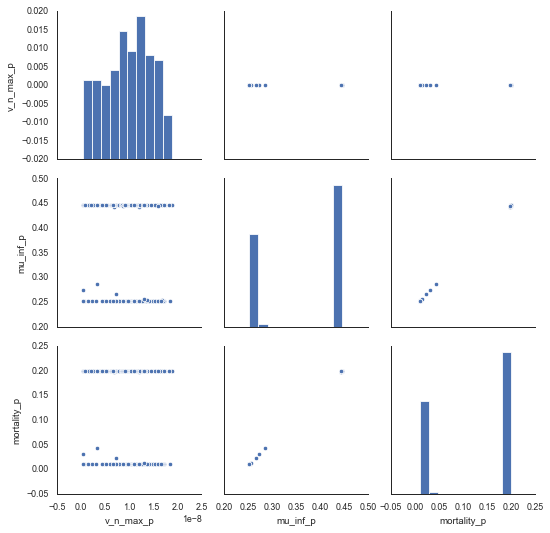

In [15]:
sns.set_context('paper')
sns.pairplot(pro_res_df[['v_n_max_p', 'mu_inf_p', 'mortality_p']])

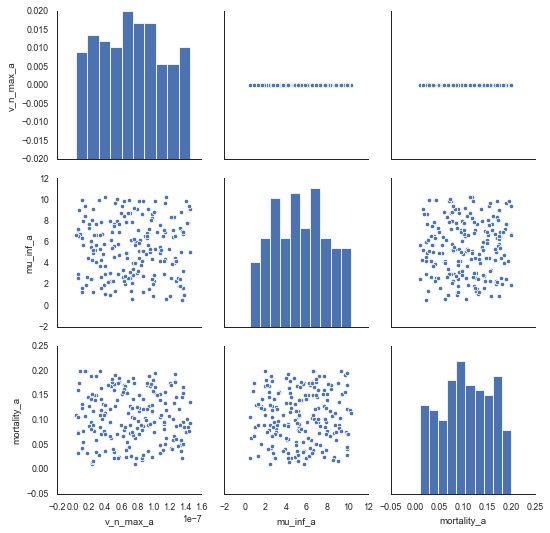

In [16]:
sns.set_context('paper')
sns.pairplot(alt_res_df[['v_n_max_a', 'mu_inf_a', 'mortality_a']])

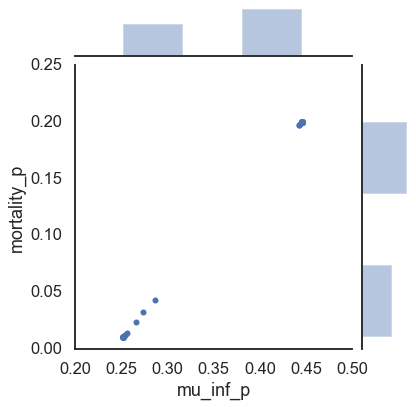

In [17]:
sns.set_context('talk')
sns.jointplot(data=pro_res_df, x='mu_inf_p', y='mortality_p')

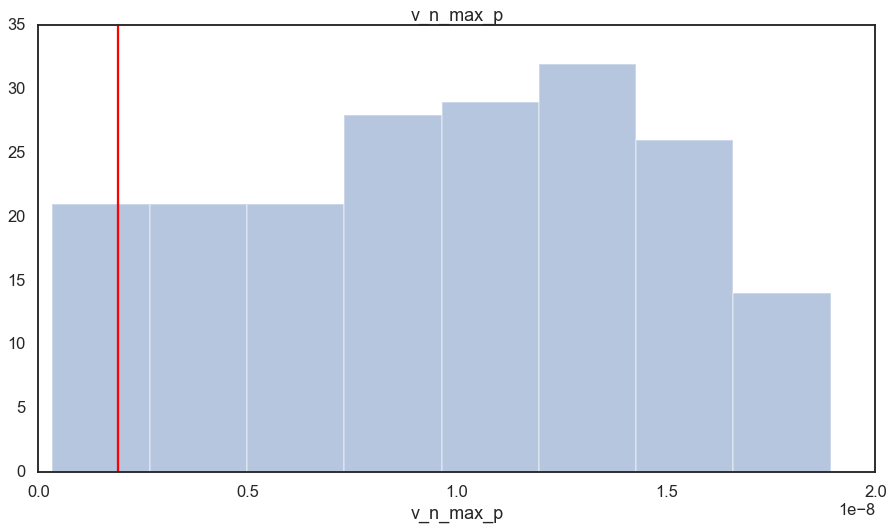

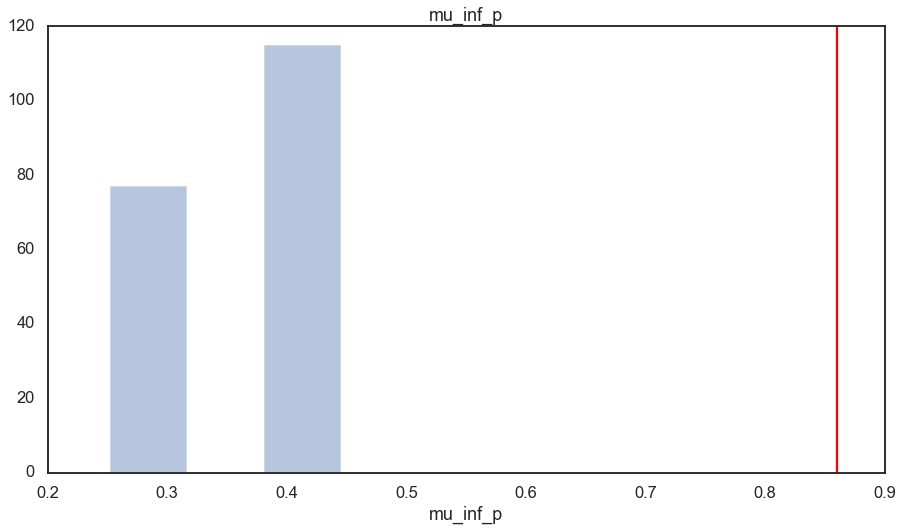

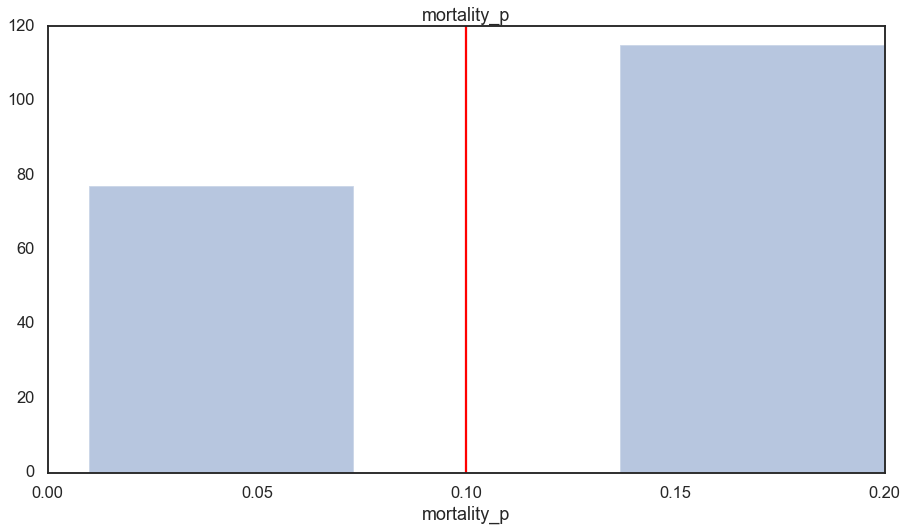

In [18]:
for i in ['v_n_max_p', 'mu_inf_p', 'mortality_p']:
    sns.distplot(pro_res_df[i], kde=False)
    plt.axvline(m.get_param_val(i), color='red')
    plt.title(i)
    plt.show()

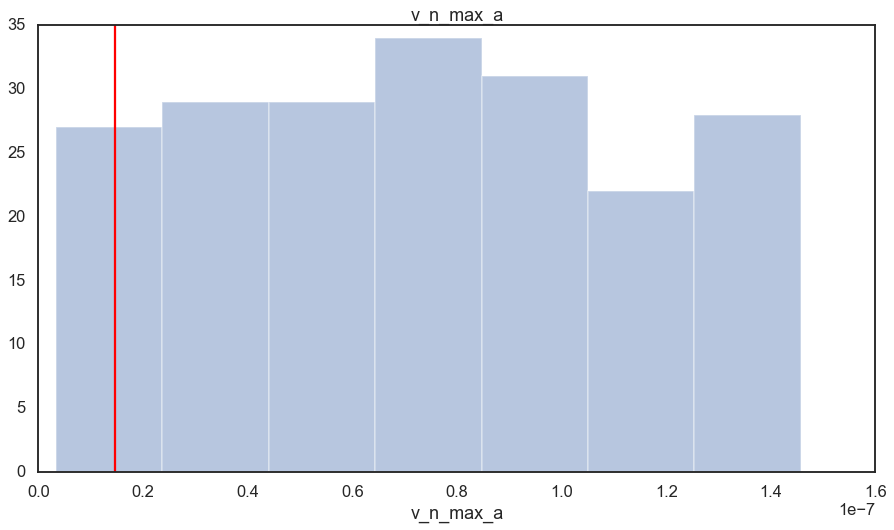

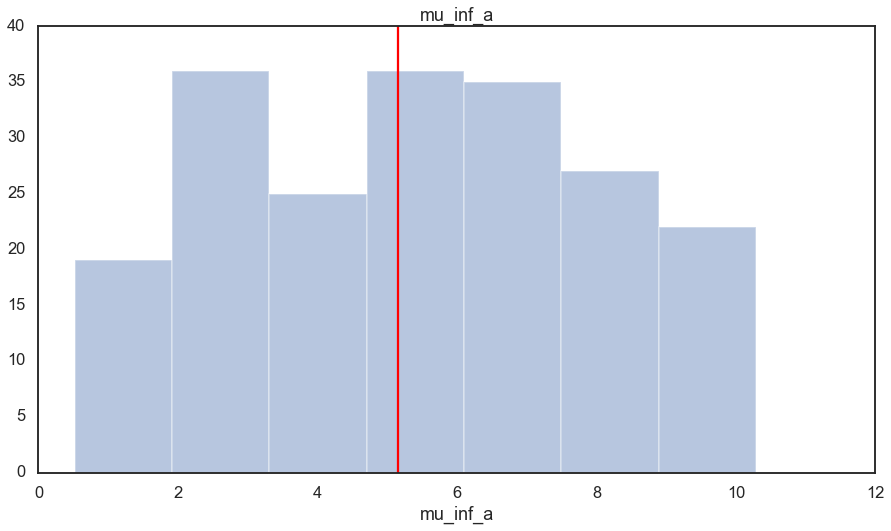

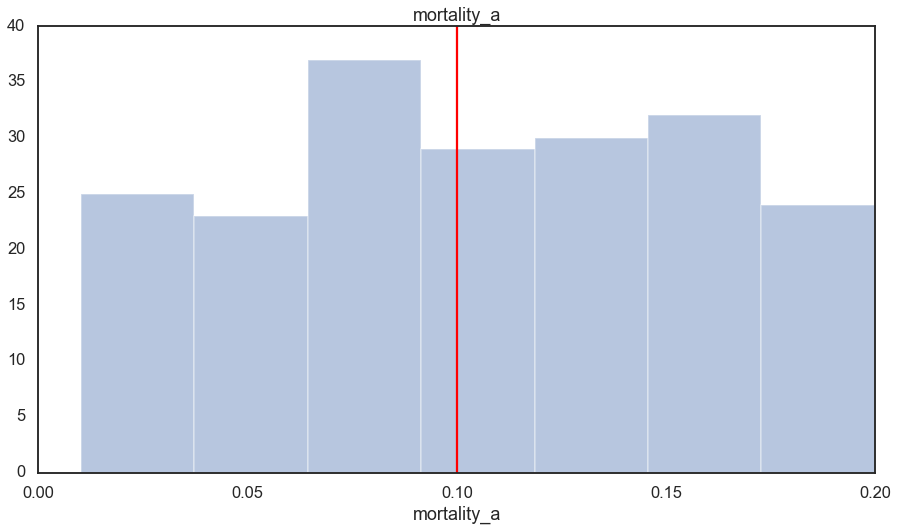

In [19]:
for i in ['v_n_max_a', 'mu_inf_a', 'mortality_a']:
    sns.distplot(alt_res_df[i], kde=False)
    plt.axvline(m.get_param_val(i), color='red')
    plt.title(i)
    plt.show()

In [20]:
pro_res_df.describe()

,Unnamed: 0,fun,nfev,nit,v_n_max_p,mu_inf_p,mortality_p
count,192.0,192.000000,192.000000,192.000000,1.920000e+02,192.000000,192.000000
mean,0.0,7.766702,585.411458,10.786458,9.723861e-09,0.368210,0.124163
std,0.0,0.000658,92.898484,2.046891,4.870548e-09,0.094713,0.092884
min,0.0,7.766166,416.000000,7.000000,3.335749e-10,0.251806,0.010000
25%,0.0,7.766166,520.000000,9.000000,6.118735e-09,0.251806,0.010000
50%,0.0,7.766166,580.000000,11.000000,9.895826e-09,0.445543,0.200000
75%,0.0,7.767463,633.000000,12.000000,1.341486e-08,0.445543,0.200000
max,0.0,7.768573,957.000000,19.000000,1.892955e-08,0.445547,0.200000


In [21]:
alt_res_df.describe()

,Unnamed: 0,fun,nfev,nit,v_n_max_a,mu_inf_a,mortality_a
count,200.0,2.000000e+02,200.0,200.0,2.000000e+02,200.000000,200.000000
mean,0.0,7.068394e+01,94.0,1.0,7.342869e-08,5.416025,0.106182
std,0.0,1.424652e-14,0.0,0.0,4.003071e-08,2.603589,0.051643
min,0.0,7.068394e+01,94.0,1.0,3.374961e-09,0.522519,0.010153
25%,0.0,7.068394e+01,94.0,1.0,3.837125e-08,3.037258,0.067797
50%,0.0,7.068394e+01,94.0,1.0,7.321619e-08,5.315877,0.105023
75%,0.0,7.068394e+01,94.0,1.0,1.051656e-07,7.375022,0.150647
max,0.0,7.068394e+01,94.0,1.0,1.457341e-07,10.287139,0.199843


In [22]:
pro_sns_df.describe()

,Unnamed: 0,excretion_n_p,fun,gamma_n_p,k_n_p,mortality_p,mu_inf_p,nfev,nit,q_n_max_p,q_n_min_p,v_n_max_p
count,213.0,104.000000,213.000000,106.000000,107.000000,93.000000,113.000000,213.000000,213.000000,1.050000e+02,1.040000e+02,1.090000e+02
mean,0.0,0.050596,33.155514,0.205382,0.121094,0.138057,0.342404,636.586854,8.140845,8.121348e-09,3.528619e-09,9.131072e-09
std,0.0,0.026493,28.190885,0.112210,0.059188,0.088772,0.068205,462.880489,5.365761,3.796171e-09,1.786181e-09,5.141032e-09
min,0.0,0.001529,7.766166,0.009255,0.011779,0.010000,0.251806,32.000000,1.000000,6.084681e-10,1.509491e-10,7.485219e-10
25%,0.0,0.030549,7.767463,0.111449,0.073069,0.010000,0.253553,125.000000,1.000000,5.430397e-09,2.183163e-09,5.210145e-09
50%,0.0,0.050159,7.769171,0.206500,0.126925,0.198618,0.343076,645.000000,10.000000,8.090117e-09,3.543850e-09,9.129598e-09
75%,0.0,0.075202,70.683937,0.298173,0.167894,0.200000,0.343076,945.000000,11.000000,1.137794e-08,4.753251e-09,1.240555e-08
max,0.0,0.097510,70.683937,0.398789,0.215147,0.200000,0.445543,1937.000000,41.000000,1.457457e-08,6.906243e-09,1.874093e-08


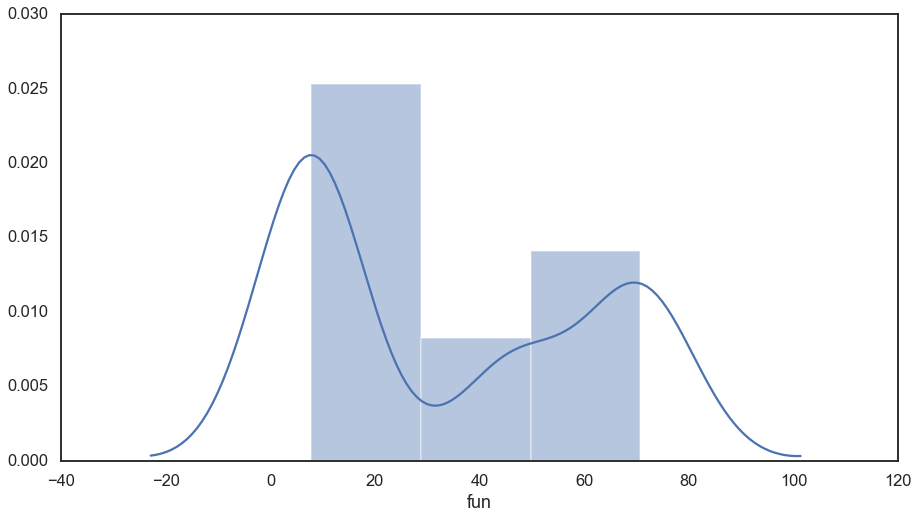

In [23]:
sns.distplot(pro_sns_df.fun)

In [24]:
pro_sns_df.nsmallest(20, 'fun')

,Unnamed: 0,excretion_n_p,fun,gamma_n_p,k_n_p,message,model_name,mortality_p,mu_inf_p,nfev,nit,q_n_max_p,q_n_min_p,success,v_n_max_p
0,0,NaN,7.766166,NaN,NaN,Optimization terminated successfully.,mu_inf_p_q_n_min_p_q_n_max_p_mortality_p,0.2,0.445543,1045,15,7.097503e-09,1.555378e-09,True,NaN
0,0,NaN,7.766166,NaN,0.021474,Optimization terminated successfully.,v_n_max_p_mu_inf_p_k_n_p_q_n_min_p_q_n_max_p_m...,0.2,0.445543,1199,11,8.845117e-09,5.698983e-09,True,1.383052e-08
0,0,0.010780,7.766166,NaN,0.188524,Optimization terminated successfully.,excretion_n_p_v_n_max_p_mu_inf_p_k_n_p_q_n_min...,0.2,0.445543,1192,11,NaN,6.190399e-09,True,7.255306e-09
0,0,NaN,7.766166,NaN,0.135731,Optimization terminated successfully.,mu_inf_p_k_n_p_q_n_max_p_mortality_p,0.2,0.445543,640,8,7.467452e-10,NaN,True,NaN
0,0,0.050391,7.766166,NaN,0.030555,Optimization terminated successfully.,excretion_n_p_v_n_max_p_mu_inf_p_k_n_p_q_n_min...,0.2,0.445543,1937,16,5.813167e-09,4.708573e-09,True,1.167116e-08
0,0,NaN,7.766166,NaN,0.067711,Optimization terminated successfully.,mu_inf_p_k_n_p_mortality_p,0.2,0.445543,666,13,NaN,NaN,True,NaN
0,0,NaN,7.766166,0.296094,NaN,Optimization terminated successfully.,gamma_n_p_v_n_max_p_mu_inf_p_q_n_max_p_mortali...,0.2,0.445543,891,10,1.205544e-08,NaN,True,5.210145e-09
0,0,NaN,7.766166,NaN,NaN,Optimization terminated successfully.,v_n_max_p_mu_inf_p_q_n_min_p_q_n_max_p_mortali...,0.2,0.445543,972,11,5.430397e-09,4.158056e-09,True,1.766648e-08
0,0,NaN,7.766166,0.360095,0.183916,Optimization terminated successfully.,gamma_n_p_mu_inf_p_k_n_p_mortality_p,0.2,0.445543,730,10,NaN,NaN,True,NaN
0,0,NaN,7.766166,0.165586,NaN,Optimization terminated successfully.,gamma_n_p_v_n_max_p_mu_inf_p_mortality_p,0.2,0.445543,910,13,NaN,NaN,True,1.854708e-08


In [25]:
pro_sns_df.loc[pro_sns_df.fun < 8].notna().sum().sort_values()

excretion_n_p     55
gamma_n_p         56
mortality_p       56
q_n_max_p         56
q_n_min_p         56
v_n_max_p         58
k_n_p             59
Unnamed: 0       113
fun              113
message          113
model_name       113
mu_inf_p         113
nfev             113
nit              113
success          113
dtype: int64

In [26]:
pro_sns_df.loc[pro_sns_df.fun < 8].isna().sum().sort_values()

Unnamed: 0        0
fun               0
message           0
model_name        0
mu_inf_p          0
nfev              0
nit               0
success           0
k_n_p            54
v_n_max_p        55
gamma_n_p        57
mortality_p      57
q_n_max_p        57
q_n_min_p        57
excretion_n_p    58
dtype: int64

In [27]:
pro_sns_df['good'] = pro_sns_df.fun < 8

In [28]:
pro_sns_df.groupby

<bound method NDFrame.groupby of     Unnamed: 0  excretion_n_p        fun  gamma_n_p     k_n_p  \
0            0       0.062197  70.683937        NaN       NaN   
0            0       0.050657  70.683937        NaN  0.180130   
0            0       0.041303  70.683937        NaN  0.086939   
0            0       0.086651  70.683937        NaN  0.127475   
0            0       0.062126  47.554274        NaN  0.125870   
..         ...            ...        ...        ...       ...   
0            0            NaN  70.683937        NaN       NaN   
0            0            NaN  47.163103        NaN       NaN   
0            0            NaN  70.683937        NaN       NaN   
0            0            NaN  47.598741        NaN       NaN   
0            0            NaN  70.683937        NaN       NaN   

                                  message  \
0   Optimization terminated successfully.   
0   Optimization terminated successfully.   
0   Optimization terminated successfully.   
0   Op

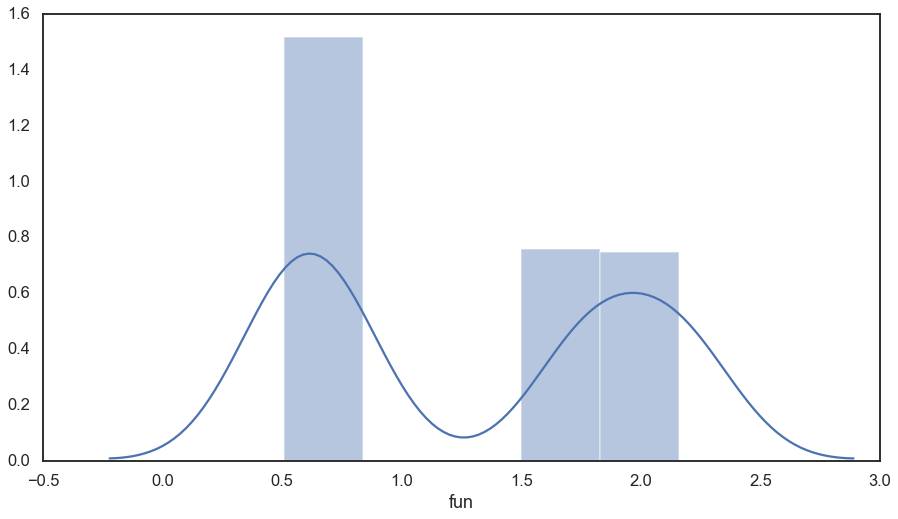

In [29]:
sns.distplot(alt_sns_df.fun)

In [30]:
pro_sns_df.loc[pro_sns_df.fun> 8].notna().sum().sort_values()

mu_inf_p           0
mortality_p       37
k_n_p             48
q_n_min_p         48
excretion_n_p     49
q_n_max_p         49
gamma_n_p         50
v_n_max_p         51
Unnamed: 0       100
fun              100
message          100
model_name       100
nfev             100
nit              100
success          100
good             100
dtype: int64

In [49]:
alt_sns_df.loc[alt_sns_df.fun< 0.7].notna().sum().sort_values()

excretion_n_a    32
gamma_n_a        32
k_n_a            32
q_n_max_a        32
q_n_min_a        32
v_n_max_a        32
Unnamed: 0       64
fun              64
message          64
model_name       64
mortality_a      64
mu_inf_a         64
nfev             64
nit              64
success          64
dtype: int64

In [47]:
alt_sns_df.loc[alt_sns_df.fun< 0.7, 'fun'].sort_values()

0    0.508266
0    0.508266
0    0.508266
0    0.508266
0    0.508266
       ...   
0    0.508266
0    0.508266
0    0.508266
0    0.508266
0    0.508266
Name: fun, Length: 64, dtype: float64

In [52]:
alt_sns_df.loc[alt_sns_df.model_name.str.contains('mu_inf')]

,Unnamed: 0,excretion_n_a,fun,gamma_n_a,k_n_a,message,model_name,mortality_a,mu_inf_a,nfev,nit,q_n_max_a,q_n_min_a,success,v_n_max_a
0,0,0.047262,1.781518,NaN,NaN,Optimization terminated successfully.,excretion_n_a_mu_inf_a,NaN,0.516000,336,10,NaN,NaN,True,NaN
0,0,0.088651,1.781518,NaN,0.378030,Optimization terminated successfully.,excretion_n_a_mu_inf_a_k_n_a,NaN,0.516000,638,13,NaN,NaN,True,NaN
0,0,0.052449,0.508266,NaN,0.375468,Optimization terminated successfully.,excretion_n_a_mu_inf_a_k_n_a_mortality_a,0.01,0.973532,1040,16,NaN,NaN,True,NaN
0,0,0.051041,1.781518,NaN,0.148292,Optimization terminated successfully.,excretion_n_a_mu_inf_a_k_n_a_q_n_max_a,NaN,0.516000,730,11,1.161484e-07,NaN,True,NaN
0,0,0.090867,0.508266,NaN,0.285935,Optimization terminated successfully.,excretion_n_a_mu_inf_a_k_n_a_q_n_max_a_mortali...,0.01,0.973524,1599,20,2.636040e-07,NaN,True,NaN
0,0,0.009110,1.781518,NaN,0.406707,Optimization terminated successfully.,excretion_n_a_mu_inf_a_k_n_a_q_n_min_a,NaN,0.516000,730,11,NaN,1.446022e-07,True,NaN
0,0,0.057175,0.508266,NaN,0.383920,Optimization terminated successfully.,excretion_n_a_mu_inf_a_k_n_a_q_n_min_a_mortali...,0.01,0.973533,1611,20,NaN,1.164571e-07,True,NaN
0,0,0.051238,1.781518,NaN,0.449801,Optimization terminated successfully.,excretion_n_a_mu_inf_a_k_n_a_q_n_min_a_q_n_max_a,NaN,0.516000,1212,15,2.623994e-07,3.778140e-08,True,NaN
0,0,0.018281,0.508266,NaN,0.452987,Optimization terminated successfully.,excretion_n_a_mu_inf_a_k_n_a_q_n_min_a_q_n_max...,0.01,0.973532,2008,21,2.336149e-07,1.318175e-07,True,NaN
0,0,0.067545,0.508266,NaN,NaN,Optimization terminated successfully.,excretion_n_a_mu_inf_a_mortality_a,0.01,0.973557,1010,21,NaN,NaN,True,NaN


In [53]:
alt_sns_df.loc[alt_sns_df.model_name.isin(['mortality_a', 'mu_inf_a_mortality_a'])]

,Unnamed: 0,excretion_n_a,fun,gamma_n_a,k_n_a,message,model_name,mortality_a,mu_inf_a,nfev,nit,q_n_max_a,q_n_min_a,success,v_n_max_a
0,0,NaN,0.722085,NaN,NaN,Optimization terminated successfully.,mortality_a,0.01,NaN,184,11,NaN,NaN,True,NaN
0,0,NaN,0.508266,NaN,NaN,Optimization terminated successfully.,mu_inf_a_mortality_a,0.01,0.97351,585,18,NaN,NaN,True,NaN


In [33]:
pro_sns_df.loc[pro_sns_df.model_name.isin(['mu_inf_p'])]

,Unnamed: 0,excretion_n_p,fun,gamma_n_p,k_n_p,message,model_name,mortality_p,mu_inf_p,nfev,nit,q_n_max_p,q_n_min_p,success,v_n_max_p,good
0,0,NaN,7.769171,NaN,NaN,Optimization terminated successfully.,mu_inf_p,NaN,0.343076,153,8,NaN,NaN,True,NaN,True


In [34]:
alt_sns_df.loc[alt_sns_df.model_name.isin(['mu_inf_a'])]

,Unnamed: 0,excretion_n_a,fun,gamma_n_a,k_n_a,message,model_name,mortality_a,mu_inf_a,nfev,nit,q_n_max_a,q_n_min_a,success,v_n_max_a
0,0,NaN,1.781518,NaN,NaN,Optimization terminated successfully.,mu_inf_a,NaN,0.516,169,10,NaN,NaN,True,NaN


(0, 0.02)

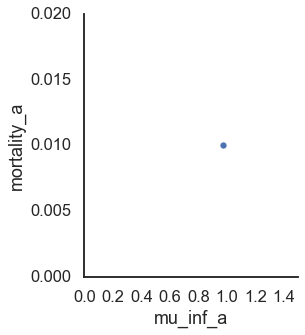

In [35]:
sns.relplot(data=alt_sns_df, x='mu_inf_a', y='mortality_a', s=50)
plt.xlim(0,1.5)
plt.ylim(0,0.02)

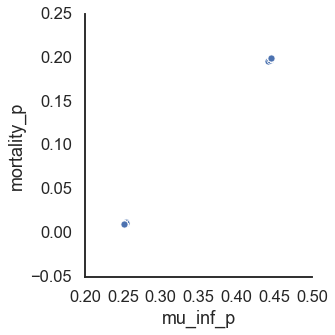

In [36]:
sns.relplot(data=pro_sns_df, x='mu_inf_p', y='mortality_p',s=50)

In [37]:
alt_sns_df.columns

Index(['Unnamed: 0', 'excretion_n_a', 'fun', 'gamma_n_a', 'k_n_a', 'message',
       'model_name', 'mortality_a', 'mu_inf_a', 'nfev', 'nit', 'q_n_max_a',
       'q_n_min_a', 'success', 'v_n_max_a'],
      dtype='object')

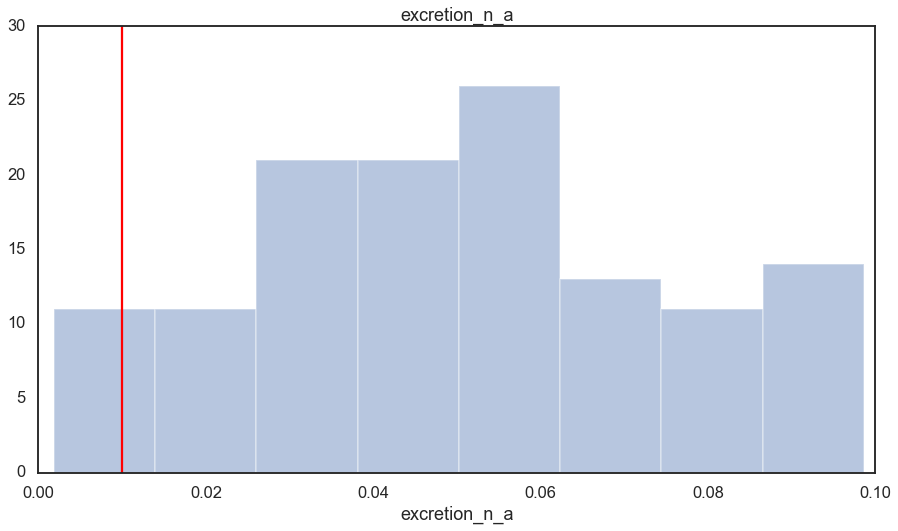

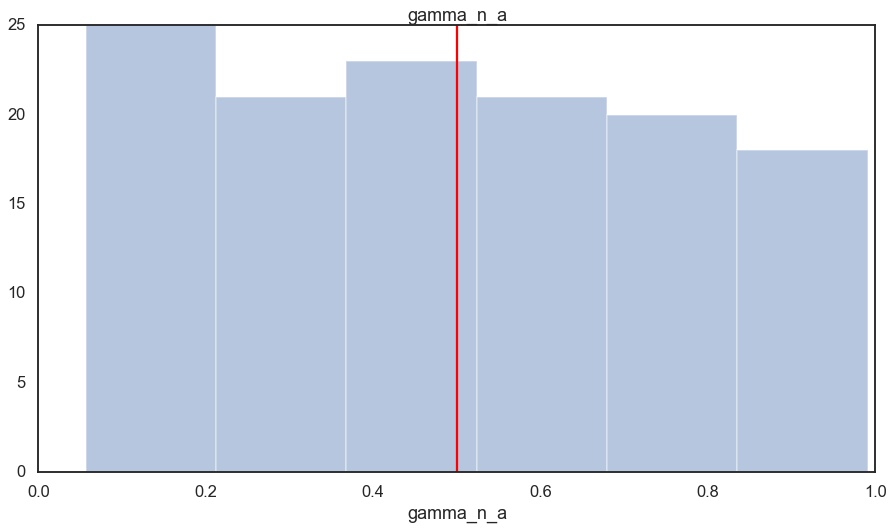

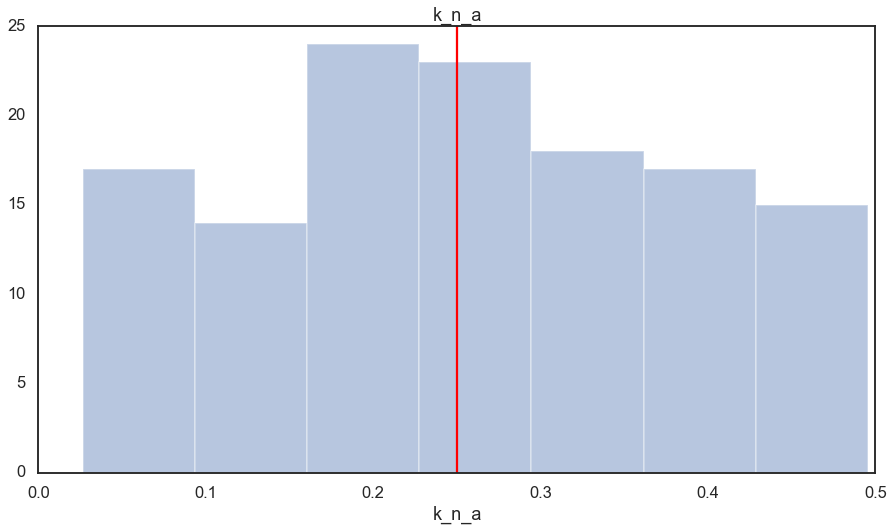

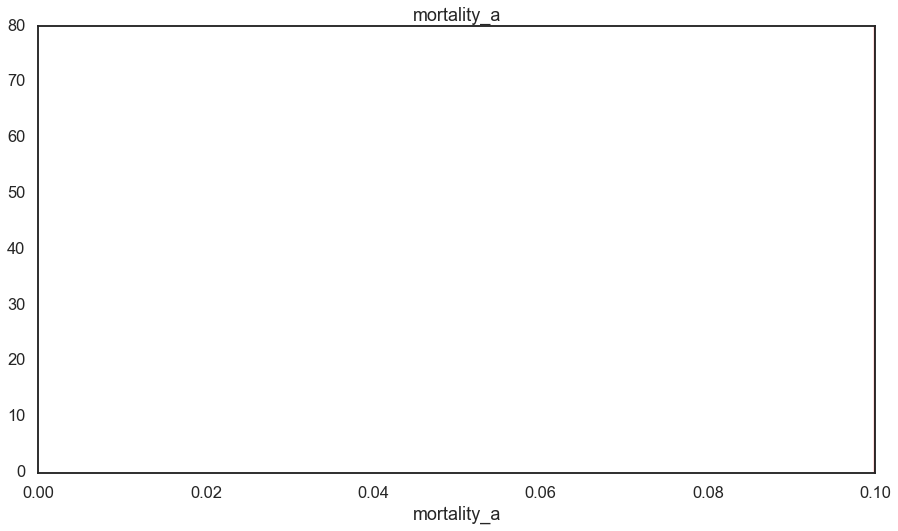

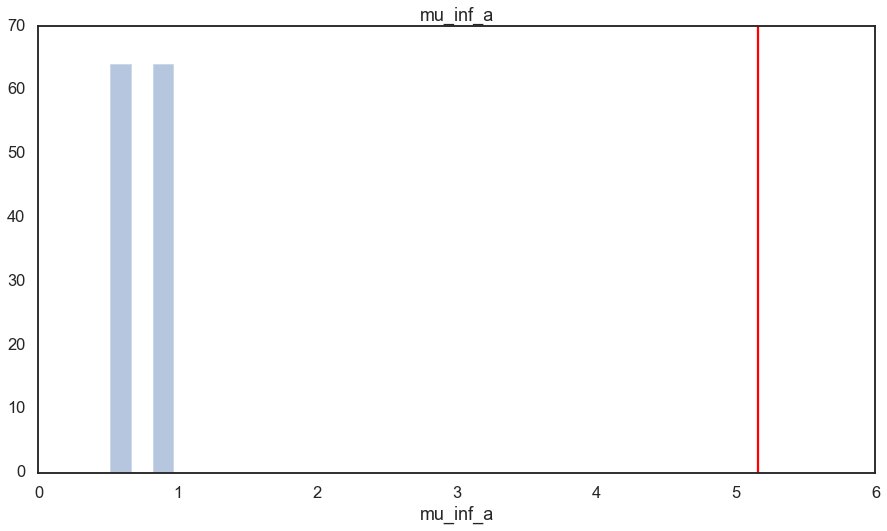

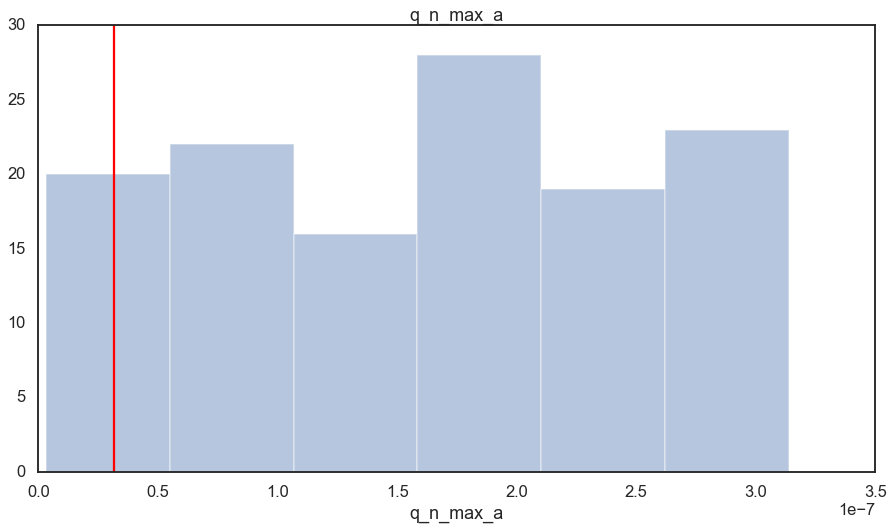

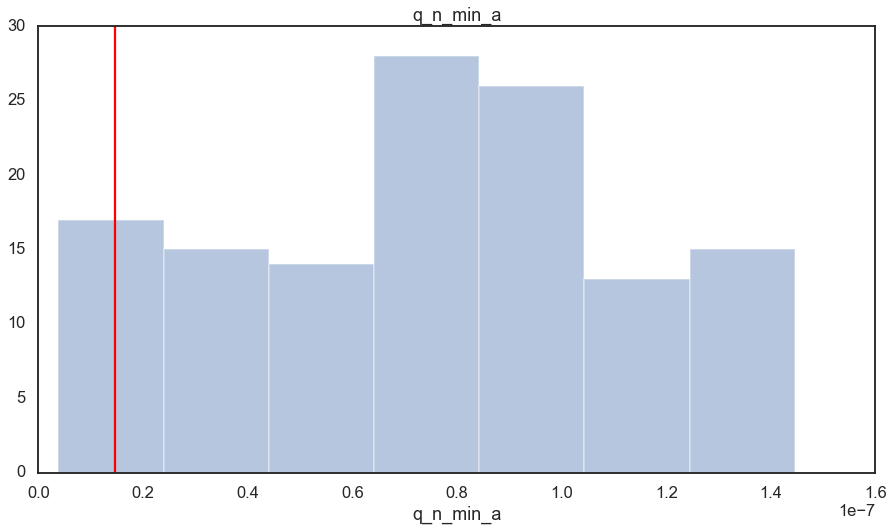

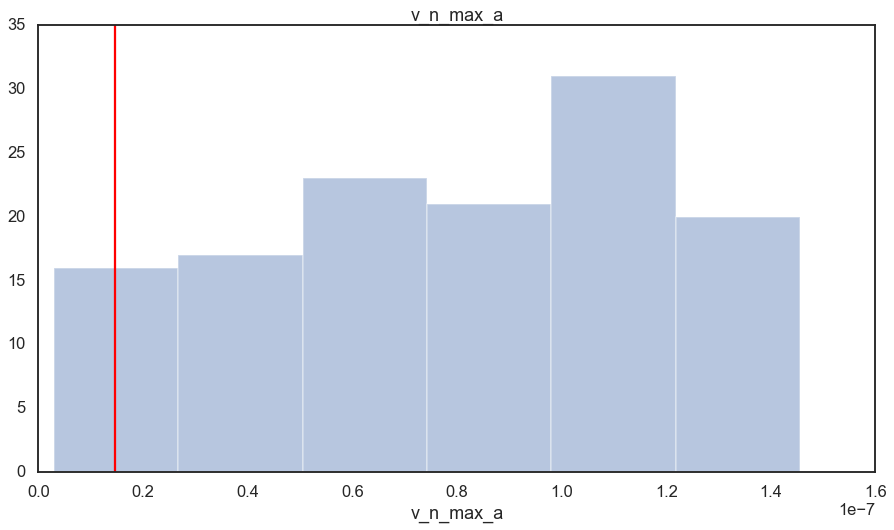

In [38]:
for i in ['excretion_n_a', 'gamma_n_a', 'k_n_a', 
        'mortality_a', 'mu_inf_a',  'q_n_max_a',
       'q_n_min_a', 'v_n_max_a']:
    sns.distplot(alt_sns_df[i].dropna(), kde=False)
    plt.axvline(m.get_param_val(i), color='red')
    plt.title(i)
    plt.show()

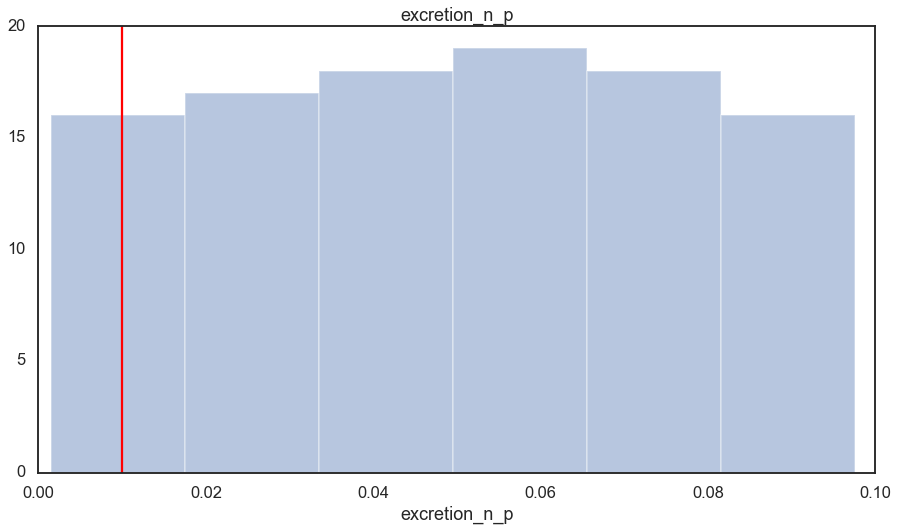

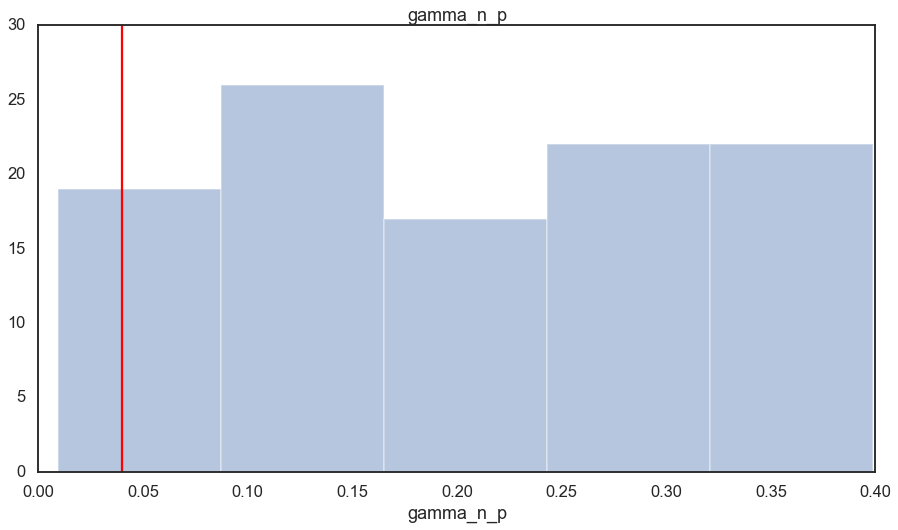

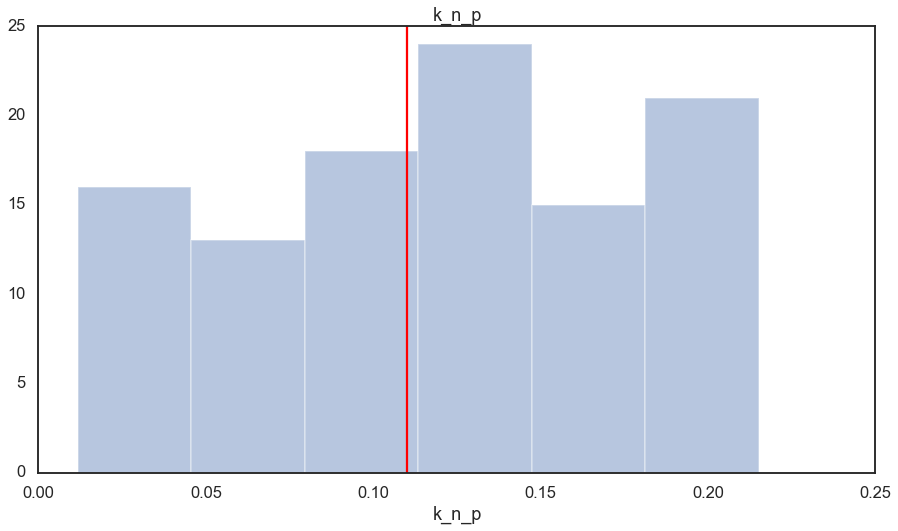

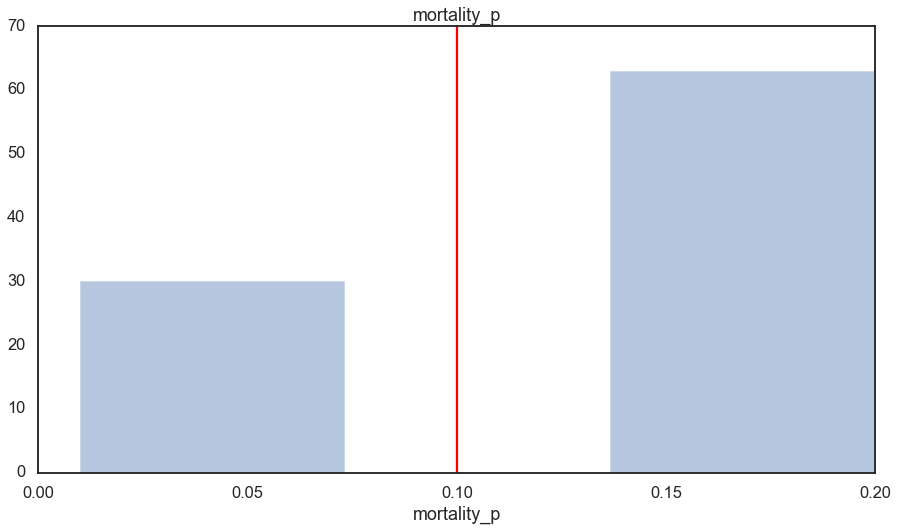

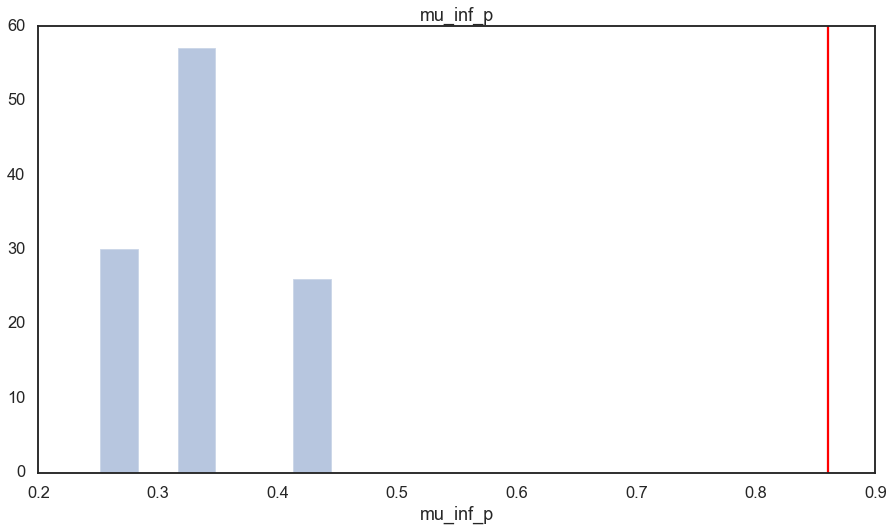

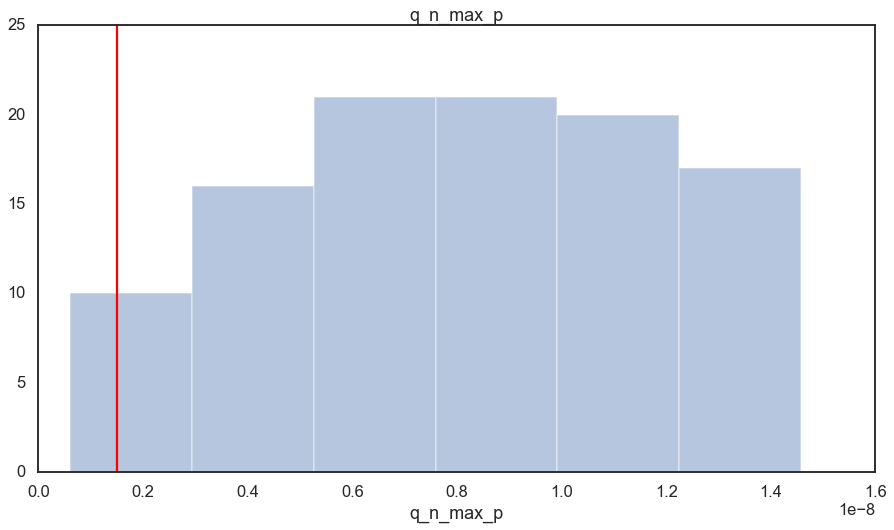

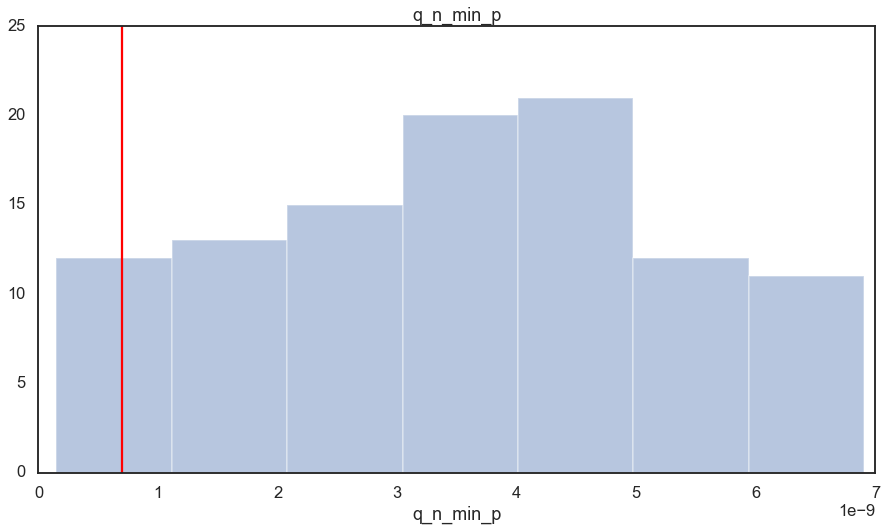

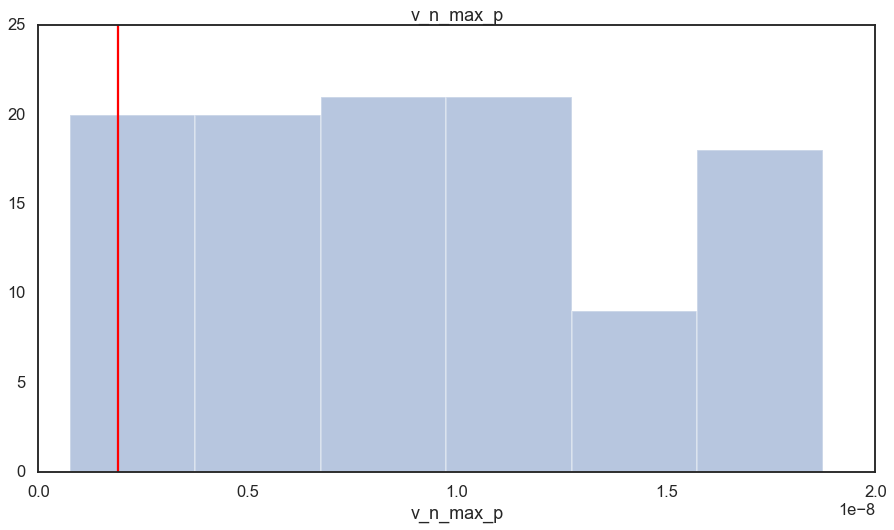

In [39]:
for i in ['excretion_n_p', 'gamma_n_p', 'k_n_p', 
        'mortality_p', 'mu_inf_p',  'q_n_max_p',
       'q_n_min_p', 'v_n_max_p']:
    sns.distplot(pro_sns_df[i].dropna(), kde=False)
    plt.axvline(m.get_param_val(i), color='red')
    plt.title(i)
    plt.show()

In [40]:
alt_sns_df[['mu_inf_a', 'mortality_a']].describe()

,mu_inf_a,mortality_a
count,128.000000,128.000000
mean,0.744763,0.010001
std,0.229662,0.000002
min,0.516000,0.010000
25%,0.516000,0.010000
50%,0.744689,0.010000
75%,0.973527,0.010001
max,0.973564,0.010009


In [41]:
alt_sns_df['mu_inf_a'].value_counts()

0.516000    62
0.973516     1
0.973525     1
0.973520     1
0.973526     1
            ..
0.973529     1
0.973553     1
0.973369     1
0.973532     1
0.973562     1
Name: mu_inf_a, Length: 67, dtype: int64

In [42]:
alt_sns_df.loc[alt_sns_df.mu_inf_a<0.6, 'mortality_a'].value_counts()

Series([], Name: mortality_a, dtype: int64)

In [43]:
alt_sns_df.loc[alt_sns_df.mu_inf_a>0.6, 'mortality_a'].value_counts()

0.01    64
Name: mortality_a, dtype: int64

In [64]:
m.parameters.keys()

dict_keys(['gamma_n_p', 'gamma_c_p', 'gamma_n_a', 'gamma_c_a', 'gamma_refractory_n_p', 'gamma_refractory_c_p', 'gamma_refractory_n_a', 'gamma_refractory_c_a', 'excretion_n_p', 'excretion_c_p', 'excretion_n_a', 'excretion_c_a', 'v_n_max_p', 'v_c_max_p', 'v_in_max_a', 'v_n_max_a', 'v_c_max_a', 'mu_inf_p', 'mu_inf_a', 'k_n_p', 'k_c_p', 'k_n_a', 'k_in_a', 'k_c_a', 'q_n_min_p', 'q_c_min_p', 'q_n_min_a', 'q_c_min_a', 'q_n_max_p', 'q_c_max_p', 'q_n_max_a', 'q_c_max_a', 'mortality_p', 'mortality_a', 'r0_p', 'r0_a', 'b_p', 'b_a', 'delta_t'])

In [57]:
m.print_param_values()

gamma_n_p 0.04
gamma_c_p 0.04
gamma_n_a 0.5
gamma_c_a 0.5
gamma_refractory_n_p 0.1
gamma_refractory_c_p 0.1
gamma_refractory_n_a 0.1
gamma_refractory_c_a 0.1
excretion_n_p 0.01
excretion_c_p 0.01
excretion_n_a 0.01
excretion_c_a 0.01
v_n_max_p 1.9e-09
v_c_max_p 8e-09
v_in_max_a 1.4582177199759883e-09
v_n_max_a 1.4582177199759882e-08
v_c_max_a 6.139864084109425e-08
mu_inf_p 0.86
mu_inf_a 5.16
k_n_p 0.11008885160313818
k_c_p 0.11008885160313818
k_n_a 0.2502723352076287
k_in_a 0.02502723352076287
k_c_a 0.2502723352076287
q_n_min_p 7e-10
q_c_min_p 3e-11
q_n_min_a 1.4658725248598342e-08
q_c_min_a 6.282310820827862e-10
q_n_max_p 1.5e-09
q_c_max_p 6e-09
q_n_max_a 3.1411554104139307e-08
q_c_max_a 1.2564621641655723e-07
mortality_p 0.1
mortality_a 0.1
r0_p 0.18
r0_a 0.18
b_p 0.01
b_a 0.01
delta_t 1.1574074074074073e-05


In [58]:
12 * 5

60

In [72]:
8**3 * 2


1024

In [81]:
from itertools import combinations_with_replacement
values = ['0.05', '0.1', '0.5']
params = ['gamma_n_p', 'gamma_c_p', 'gamma_n_a', 'gamma_c_a', 
          'gamma_refractory_n_p', 'gamma_refractory_c_p', 'gamma_refractory_n_a', 'gamma_refractory_c_a', 
          'excretion_n_p', 'excretion_c_p', 'excretion_n_a', 'excretion_c_a']

comb = combinations_with_replacement(values, len(params))

In [82]:
sbatch_str = 'sbatch -p hive1d,preempt1d --wrap '
cmd_str = '/data/home/snir/oweissber/model_work/ccpa/model/basic_model_lib.py  ' \
          '--param_values {values_list} '\
          '--param_names {params_list} '\
          '--ref_csv /data/home/snir/oweissber/model_work/ccpa/model/med4_1a3_ref.csv '\
          '--ref_pro_col PRO_CO --ref_alt_col ALT_CO '\
          '--outfile /data/home/snir/oweissber/model_work/run_optimize/gamma_exploration/{model_name}.csv'


In [90]:
with open('gamma_command_list', 'w') as fp1:
    with open('gamma_metadata.csv', 'w') as fp2:
        # headder line
        print ('model_name', ',', ','.join(params), file=fp2)

        comb = combinations_with_replacement(values, len(params))
        for i, j in enumerate(comb):
            model_name = f'gamma_model_{i}'
            print(sbatch_str + " '" + 
                  cmd_str.format(params_list=' '.join(params), 
                                 values_list = ' '.join(j),
                                 model_name=model_name
                                )
                  + "'", file=fp1
                 )
            print (model_name, ',', ','.join(j), file=fp2)


In [68]:
len(list(comb))

91

In [71]:
for i in comb:
    print(i)

(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1)
(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.5)
(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.1)
(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.5)
(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.5, 0.5)
(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1)
(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.1, 0.5)
(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.5, 0.5)
(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.5, 0.5, 0.5)
(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1)
(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.5)
(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.1, 0.5, 0.5)
(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.5, 0.5, 0.5)
(0.05, 0.05, 0